In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

Loading in data along with scores for groups 2&3

In [5]:

Group1_scores = []
Group2_scores = []
Group3_scores = []

def emotion_definer(emotions):
    emotions = emotions.split(";")
    emotions = [x.strip(' ') for x in emotions]
    emotion_score = []
    for emotion in emotions:
        emotion = emotion.lower()
        if emotion == 'happy' or emotion == 'immersed' or emotion == 'excited' or emotion == 'hyped up' or emotion == 'hypedup' or emotion == 'delighted':
            emotion_score.append(2)
        elif emotion == 'sad' or emotion == 'angry' or ('frustrated' in emotion) or ('annoyed' in emotion) or emotion == 'bored' or emotion == 'sleepy' or emotion == 'tired' or emotion == 'nervous' or ('anxious' in emotion) or emotion == 'scared':
            emotion_score.append(0)
        elif emotion == 'tense' or emotion == 'confused' or  emotion == 'relaxed' or emotion == 'intrigued' or emotion == 'interest' or emotion == 'content' or emotion == 'calm' or emotion == 'mellow' or emotion == 'alright' or emotion == 'fine' or emotion == 'other':
            emotion_score.append(1)

    if not emotion_score:
        emotion_score.append(0)

    emotion = round(np.mean(emotion_score))

    if emotion is np.nan:
        emotion = 0

    return emotion




def load_Scores(location):
    print(location)
    folder = location[:-19]
    print(folder)
    var = os.listdir(folder)
    group = ''

    if "Group 1" in location:
        group = "Group 1"
    elif "Group 2" in location:
        group = "Group 2"
    elif "Group 3" in location:
        group = "Group 3"
        folder = folder + "/"

    for file in var:
        if group in file:
            if "xlsx" in file:
                location = folder + file
                data = pd.read_excel(location)
            elif "csv" in file:
                location = folder + file
                data = pd.read_csv(location)


    if "How would you rate this performance?" in data.columns:
        order = data["Watch ID"]
        scores = data["How would you rate this performance?"]
    elif "How did you rate the performance?" in data.columns:
        order = data["Watch ID"]
        scores  = data["How did you rate the performance?"]
    elif "How would you rate this performance?（10 is the best）" in data.columns:
        order = data["ID"]
        scores  = data["How would you rate this performance?（10 is the best）"]

    if "How would you describe your feelings through the performance?" in data.columns:
        emotions = data["How would you describe your feelings through the performance?"]
    elif "How do you describe your feeling during the programme? You may make multiple choices.\n" in data.columns:
        emotions = data["How do you describe your feeling during the programme? You may make multiple choices.\n"]

    emotions = emotions.apply(emotion_definer)

    return scores, order, emotions


def match_scores_to_data(scores, scores_order, emotions, data, data_order):
    matched_scores = []
    matched_data = []
    matched_emotions = []

    # Zip the scores and order and the data and data order
    scores_zip = zip(scores_order, scores, emotions)
    data_zip = zip(data_order, data)

    # Sort the zipped lists by order
    scores_zip = sorted(scores_zip, key=lambda x: x[0])
    data_zip = sorted(data_zip, key=lambda x: x[0])

    # Unzip the sorted lists
    sorted_scores_order, sorted_scores, sorted_emotions = zip(*scores_zip)
    sorted_data_order, sorted_data = zip(*data_zip)

    # Match the scores to the data using the order of each
    for i in range(min(len(sorted_scores_order), len(sorted_data_order))):
        if sorted_scores_order[i] == sorted_data_order[i]:
            matched_scores.append(sorted_scores[i])
            matched_data.append(sorted_data[i])
            matched_emotions.append(emotions[i])
    return matched_scores, matched_data, matched_emotions


def load_data(location):
    data1_loc = location + "/group1_processed.csv"
    data2_loc = location + "/group2_processed.csv"
    data3_loc = location + "/group3_processed.csv"
    data1 = pd.read_csv(data1_loc)
    data2 = pd.read_csv(data2_loc)
    data3 = pd.read_csv(data3_loc)

    order1 = data1["Order"].values
    order2 = data2["Order"].values
    order3 = data3["Order"].values

    data1 = data1.drop(["Order"], axis=1).values.tolist()
    data2 = data2.drop(["Order"], axis=1).values.tolist()
    data3 = data3.drop(["Order"], axis=1).values.tolist()


    return data1, data2, data3, order1, order2, order3


try:
    Group1_scores, Group1_scores_order, Group1_emotions = load_Scores("/mnt/ArtHeart/Data/Group 1 Scores.xlsx")
    Group2_scores,Group2_scores_order, Group2_emotions = load_Scores("/mnt/ArtHeart/Data/Group 2 Scores.xlsx")
    Group3_scores,Group3_scores_order, Group3_emotions = load_Scores("/mnt/ArtHeart/Data/Group 3 Scores.csv")
    Group1_processed, Group2_processed, Group3_processed, Group1_order, Group2_order, Group3_order = load_data("/mnt/ArtHeart/Data")
except:
    try:
        Group1_scores, Group1_scores_order, Group1_emotions = load_Scores("W:\PhD\ArtHeart\Data\Group 1 Scores.xlsx")
        Group2_scores,Group2_scores_order, Group2_emotions = load_Scores("W:\PhD\ArtHeart\Data\Group 2 Scores.xlsx")
        Group3_scores,Group3_scores_order, Group3_emotions = load_Scores("W:\PhD\ArtHeart\Data\Group 3 Scores.csv")
        Group1_processed, Group2_processed, Group3_processed, Group1_order, Group2_order, Group3_order = load_data("W:\PhD\ArtHeart\Data")

    except:
        Group1_scores, Group1_scores_order, Group1_emotions = load_Scores("Data/Group 1 Scores.xlsx")
        Group2_scores,Group2_scores_order, Group2_emotions = load_Scores("Data/Group 2 Scores.xlsx")
        Group3_scores,Group3_scores_order, Group3_emotions = load_Scores("Data/Group 3 Scores.csv")
        Group1_processed, Group2_processed, Group3_processed, Group1_order, Group2_order, Group3_order = load_data("Data")





#Group1_scores, Group1_processed, Group1_emotions = match_scores_to_data(Group1_scores, Group1_scores_order, Group1_emotions, Group1_processed, Group1_order)
Group2_scores, Group2_processed, Group2_emotions = match_scores_to_data(Group2_scores, Group2_scores_order, Group2_emotions, Group2_processed, Group2_order)
Group3_scores, Group3_processed, Group3_emotions = match_scores_to_data(Group3_scores, Group3_scores_order, Group3_emotions, Group3_processed, Group3_order)


print(len(Group2_processed))
print(Group2_emotions)

/mnt/ArtHeart/Data/Group 1 Scores.xlsx
/mnt/ArtHeart/Data/
W:\PhD\ArtHeart\Data\Group 1 Scores.xlsx
W:\PhD\ArtHeart\Data\
W:\PhD\ArtHeart\Data\Group 2 Scores.xlsx
W:\PhD\ArtHeart\Data\
W:\PhD\ArtHeart\Data\Group 3 Scores.csv
W:\PhD\ArtHeart\Data
30
[1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]


Now we will try some 3 class classification on each group then both groups combined


First we need to standardise the data 

In [147]:
from sklearn.preprocessing import StandardScaler


std = StandardScaler()
Group1_processed = std.fit_transform(Group1_processed)
Group2_processed = std.fit_transform(Group2_processed)
Group3_processed = std.fit_transform(Group3_processed)

Now we will do feature selection on each group and then combined groups

In [148]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

Group2_processed_feat = SelectKBest(f_classif, k=15).fit_transform(Group2_processed, Group2_emotions)
Group3_processed_feat = SelectKBest(f_classif, k=15).fit_transform(Group3_processed, Group3_emotions)


Group_combined = []
Group_combined.extend(Group2_processed)
Group_combined.extend(Group3_processed)

Group_combined_emotions = []
Group_combined_emotions.extend(Group2_emotions)
Group_combined_emotions.extend(Group3_emotions)

Group_combined_feat = SelectKBest(f_classif, k=15).fit_transform(Group_combined, Group_combined_emotions)


In [149]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def test_classifiers(X, y):
    classifiers = [("AdaBoost", AdaBoostClassifier()),
                       ("RFC", RandomForestClassifier()),
                       ("KNN", KNeighborsClassifier()),
                       ("LSVC", SVC(kernel="linear", C=0.025)),
                       ("SVC", SVC()),
                       ("SVC rbf", SVC(kernel="rbf")),
                       ("SVC sigmoid", SVC(kernel="sigmoid")),
                       ("SVC poly", SVC(kernel="poly")),
                       ("GPC", GaussianProcessClassifier()),
                       ("DTC", DecisionTreeClassifier()),
                       ("MLP", MLPClassifier()),
                       ("NB", GaussianNB()),
                       ("QDA", QuadraticDiscriminantAnalysis()),
                       ("LogReg", LogisticRegression())
                       
                       ]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
    axs = axs.flatten()
    
    for i, (name, clf) in enumerate(classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cm, annot=True, cmap='Blues', ax=axs[i])
        title = name + " Accuracy: " + str(round(score, 2))
        axs[i].set_title(title)
        axs[i].set_xlabel('Predicted')
        axs[i].set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()
        
        


Starting with group 2

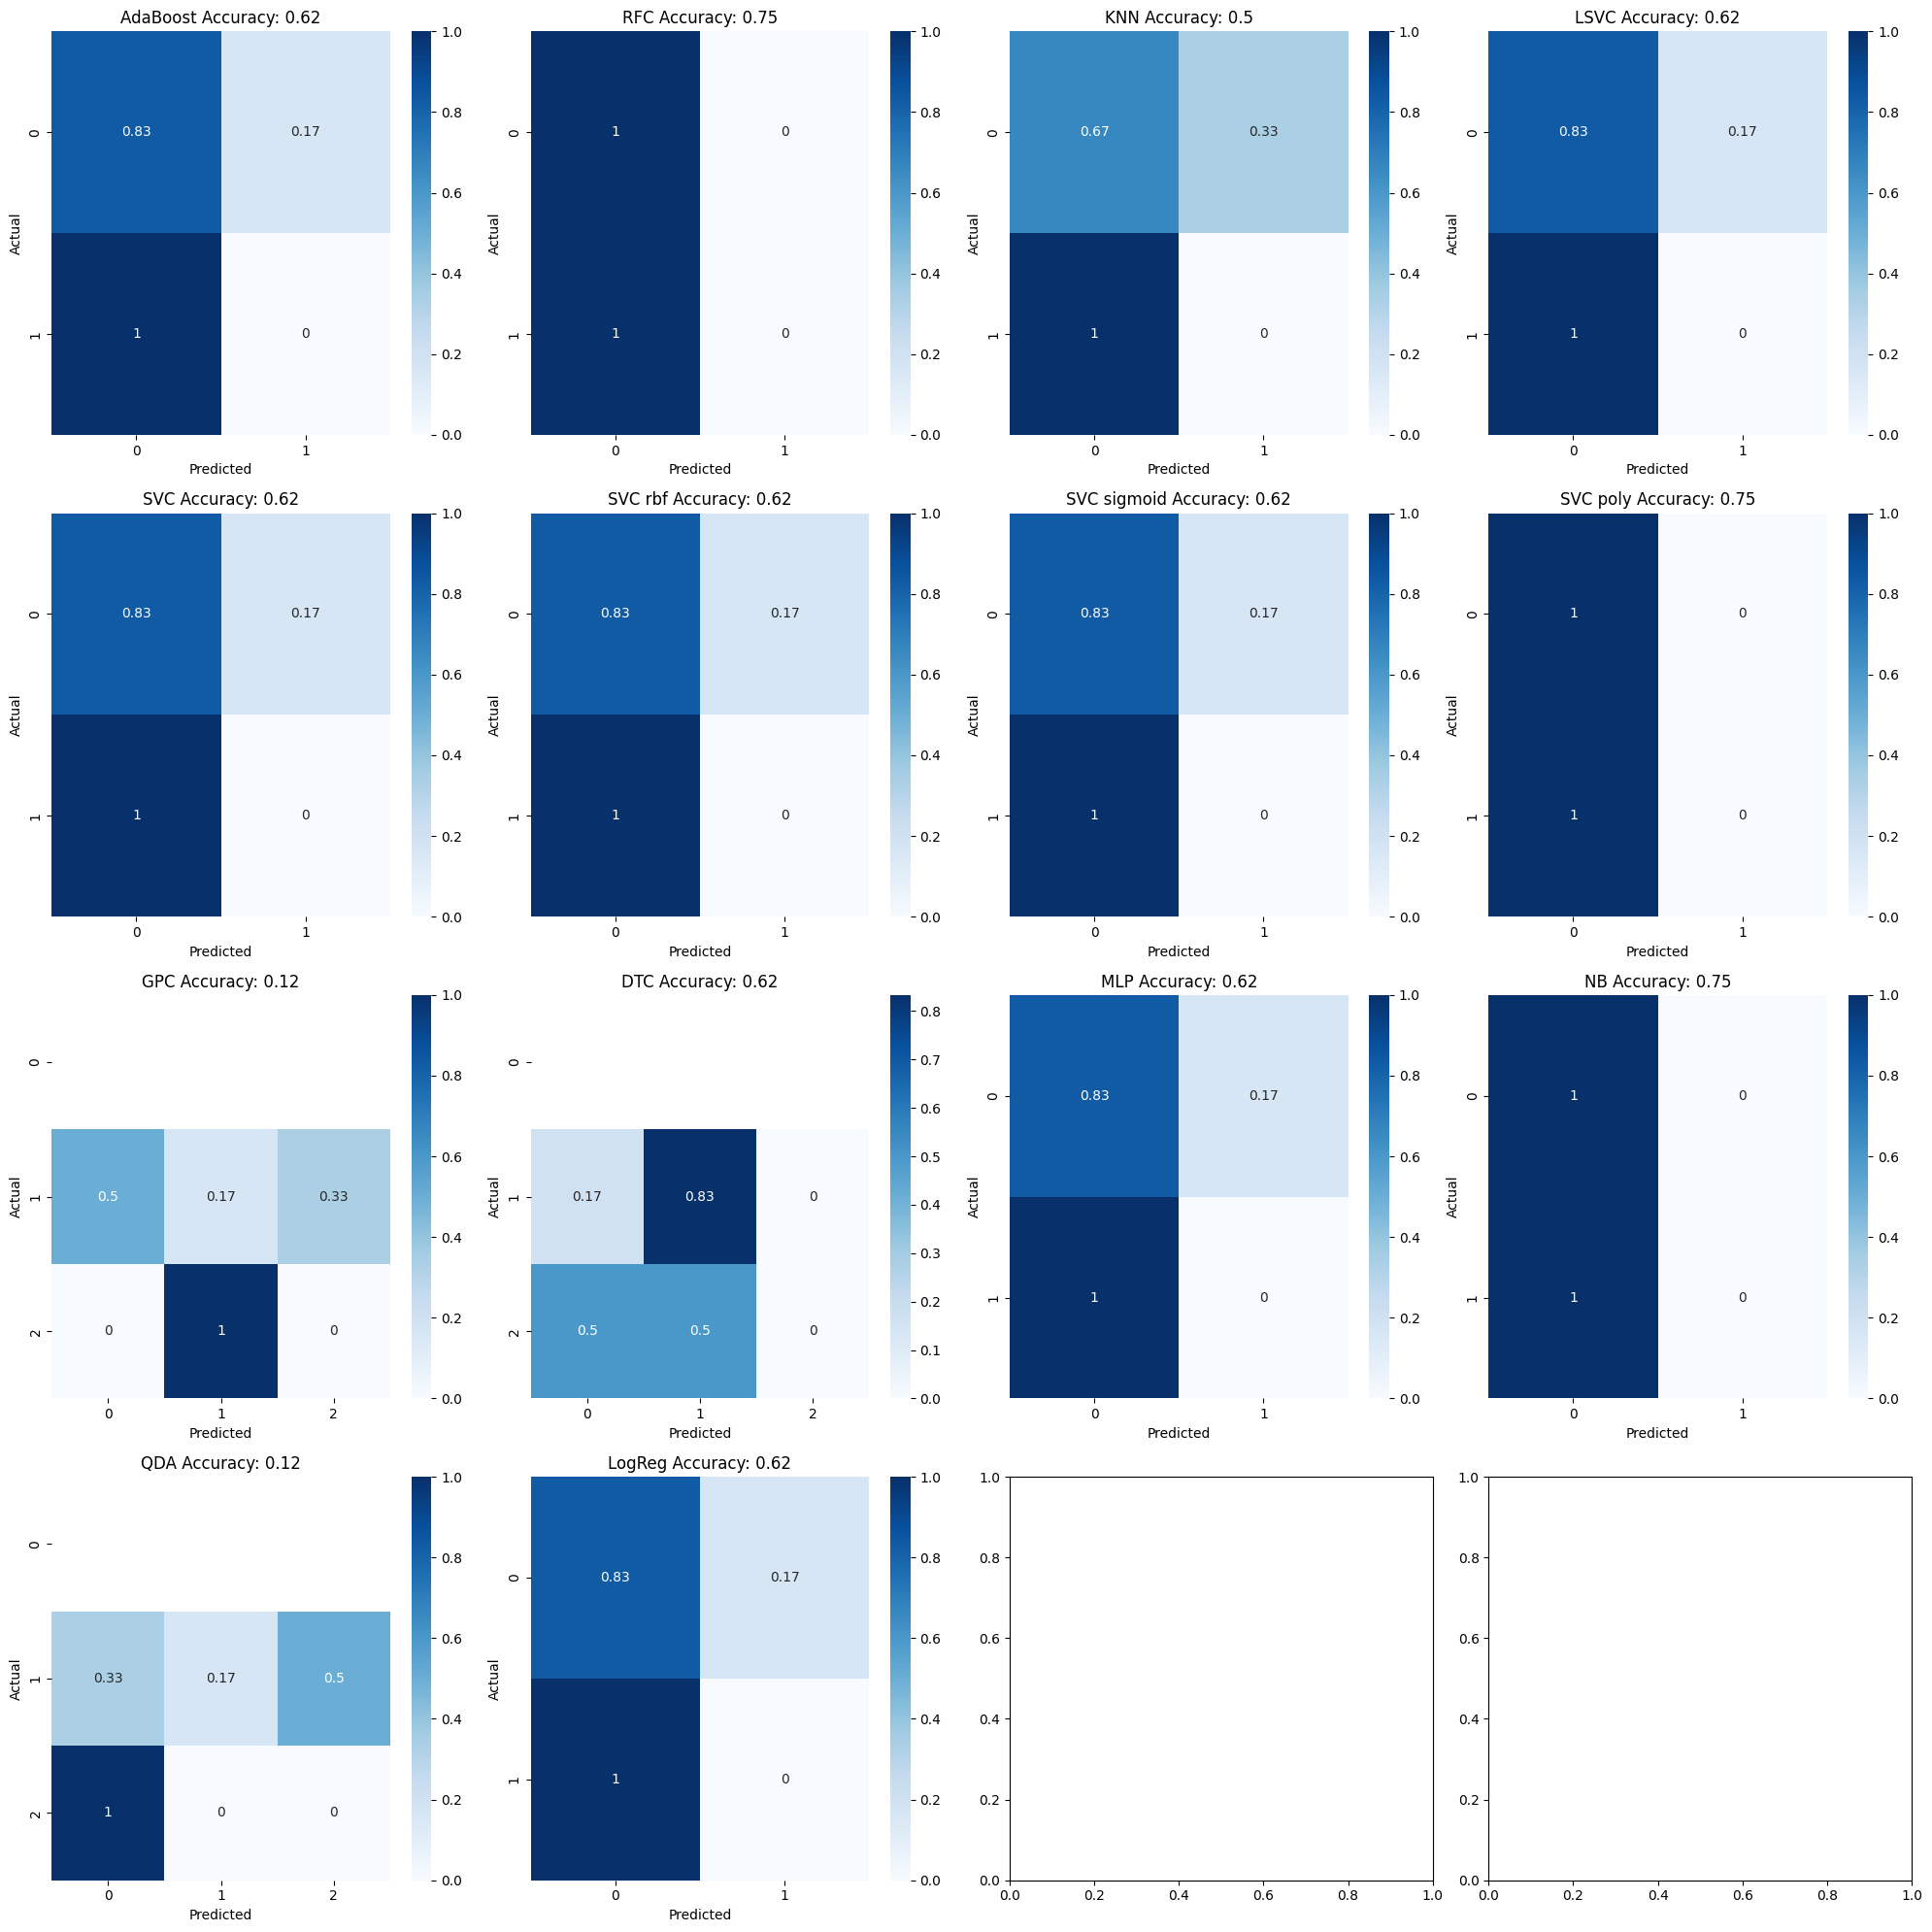

In [150]:
test_classifiers(Group2_processed_feat, Group2_emotions)

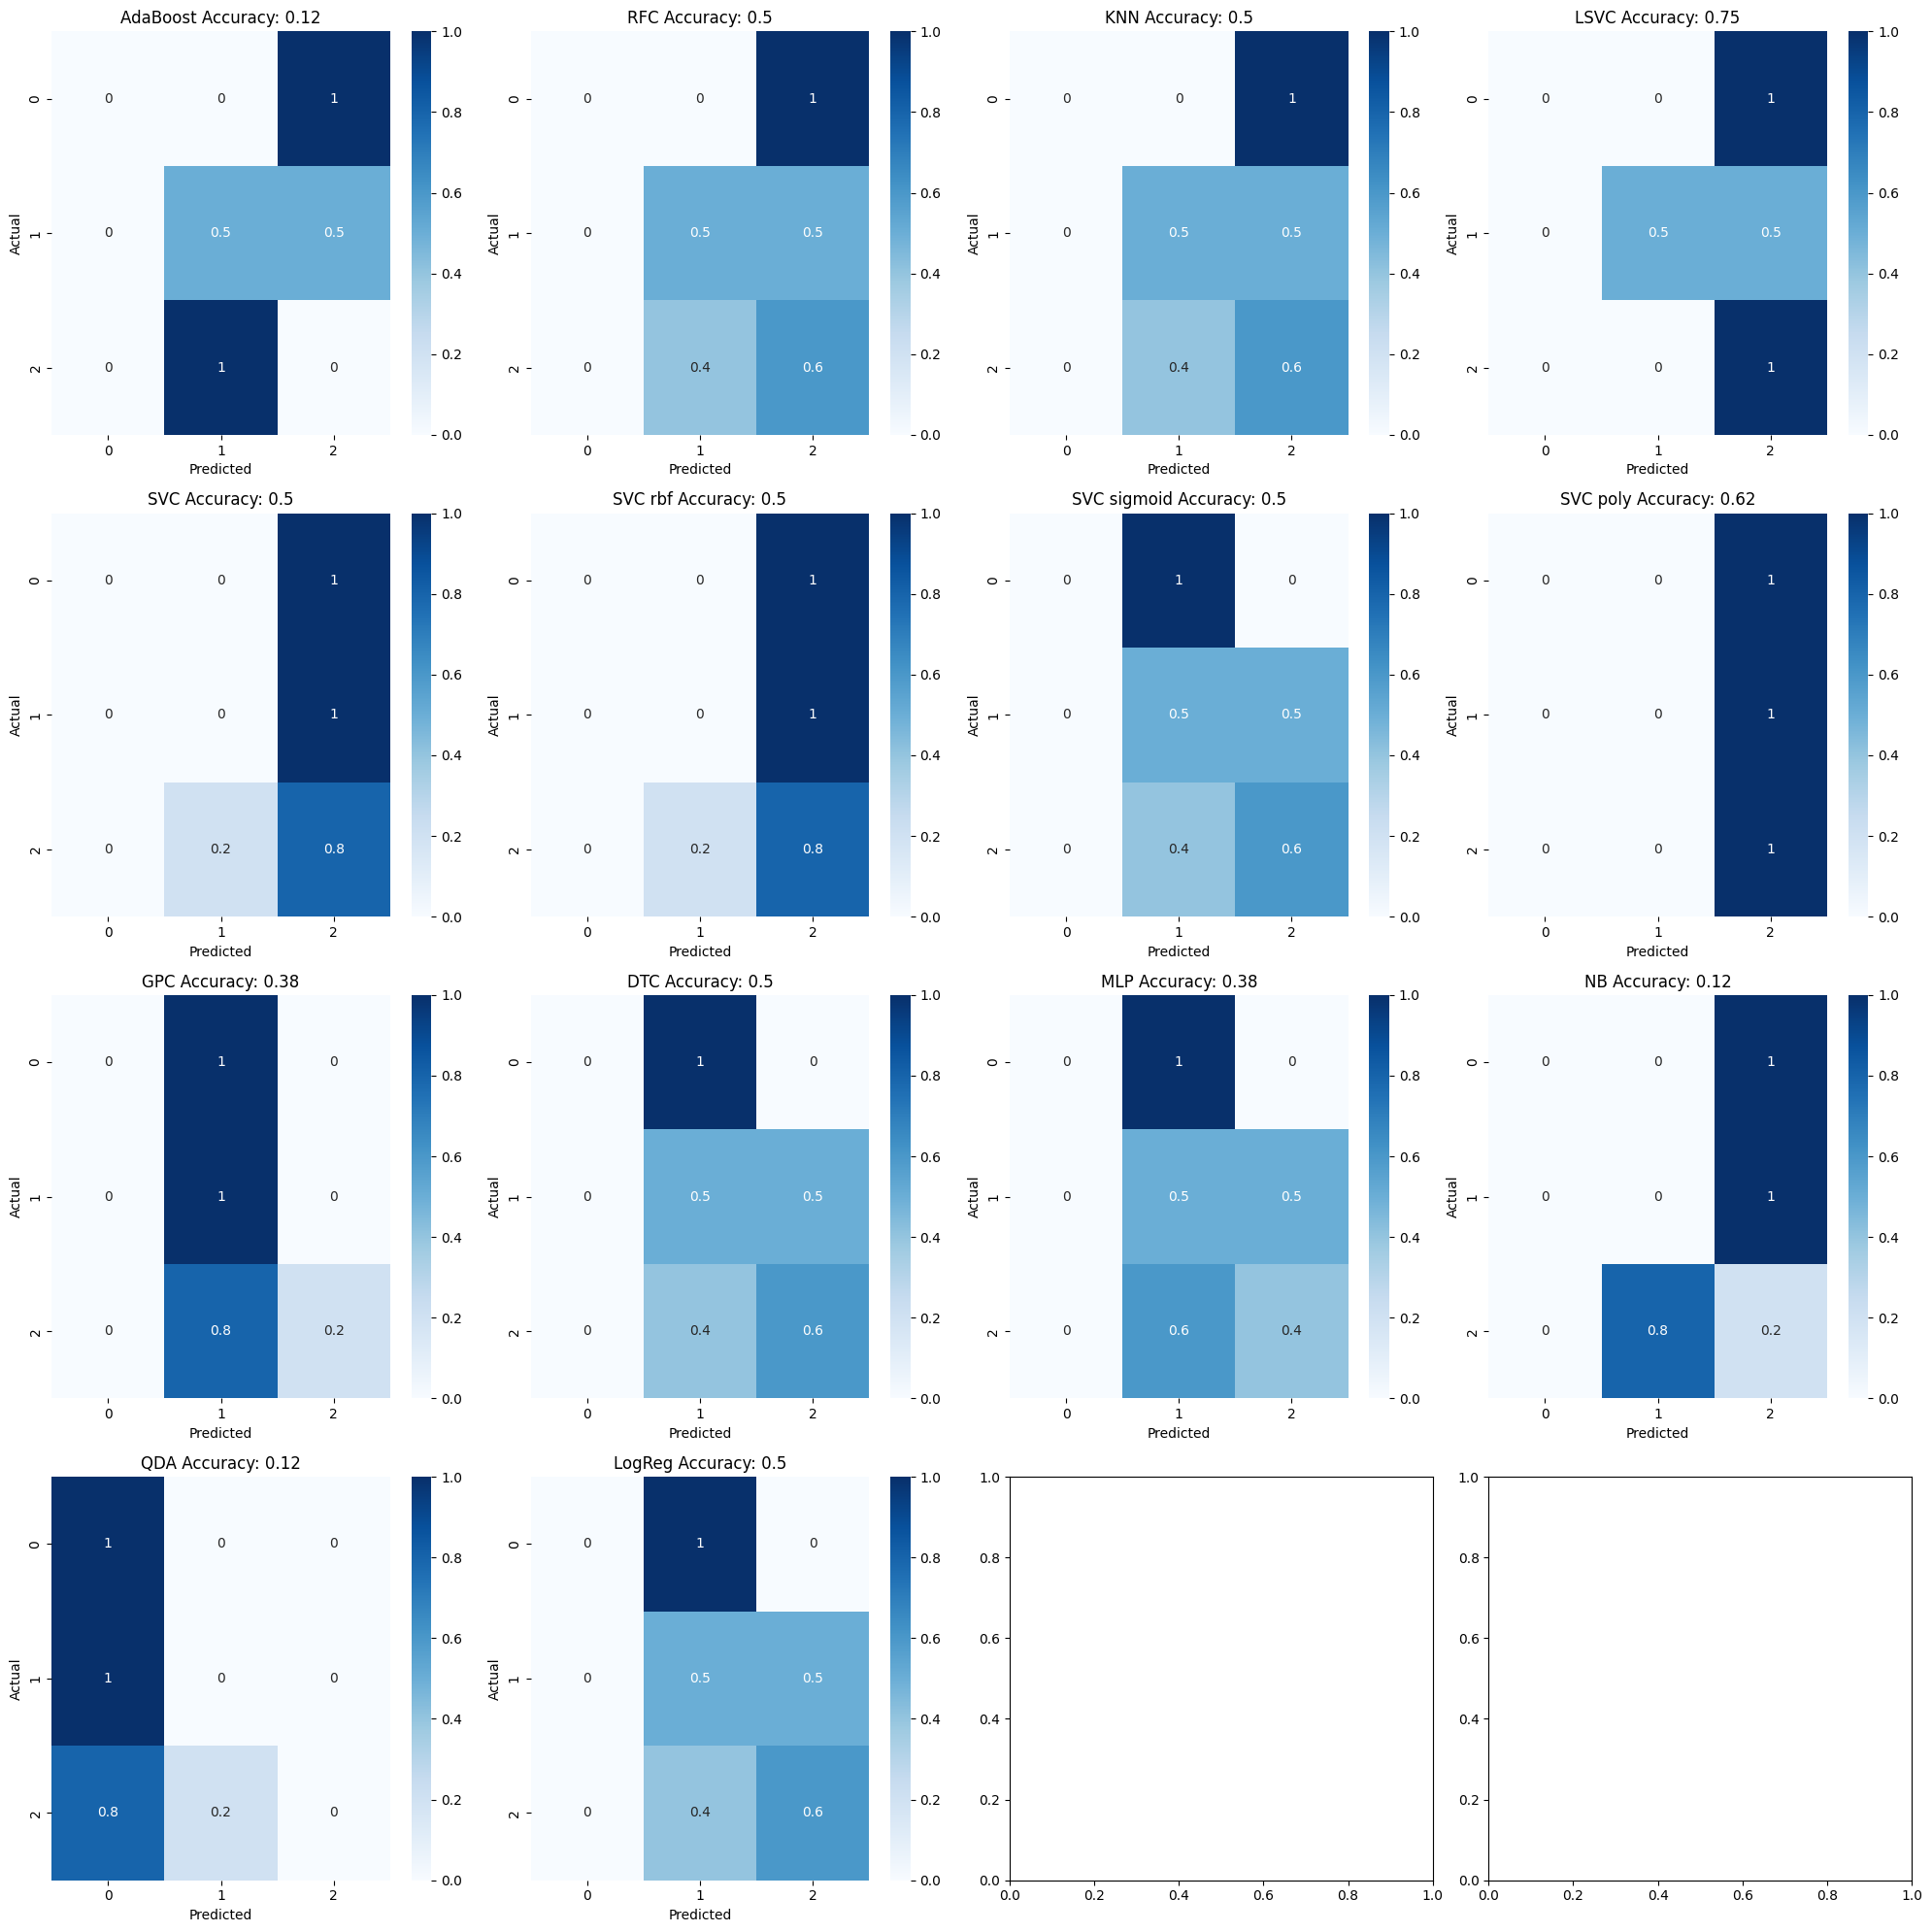

In [151]:
test_classifiers(Group3_processed_feat, Group3_emotions)

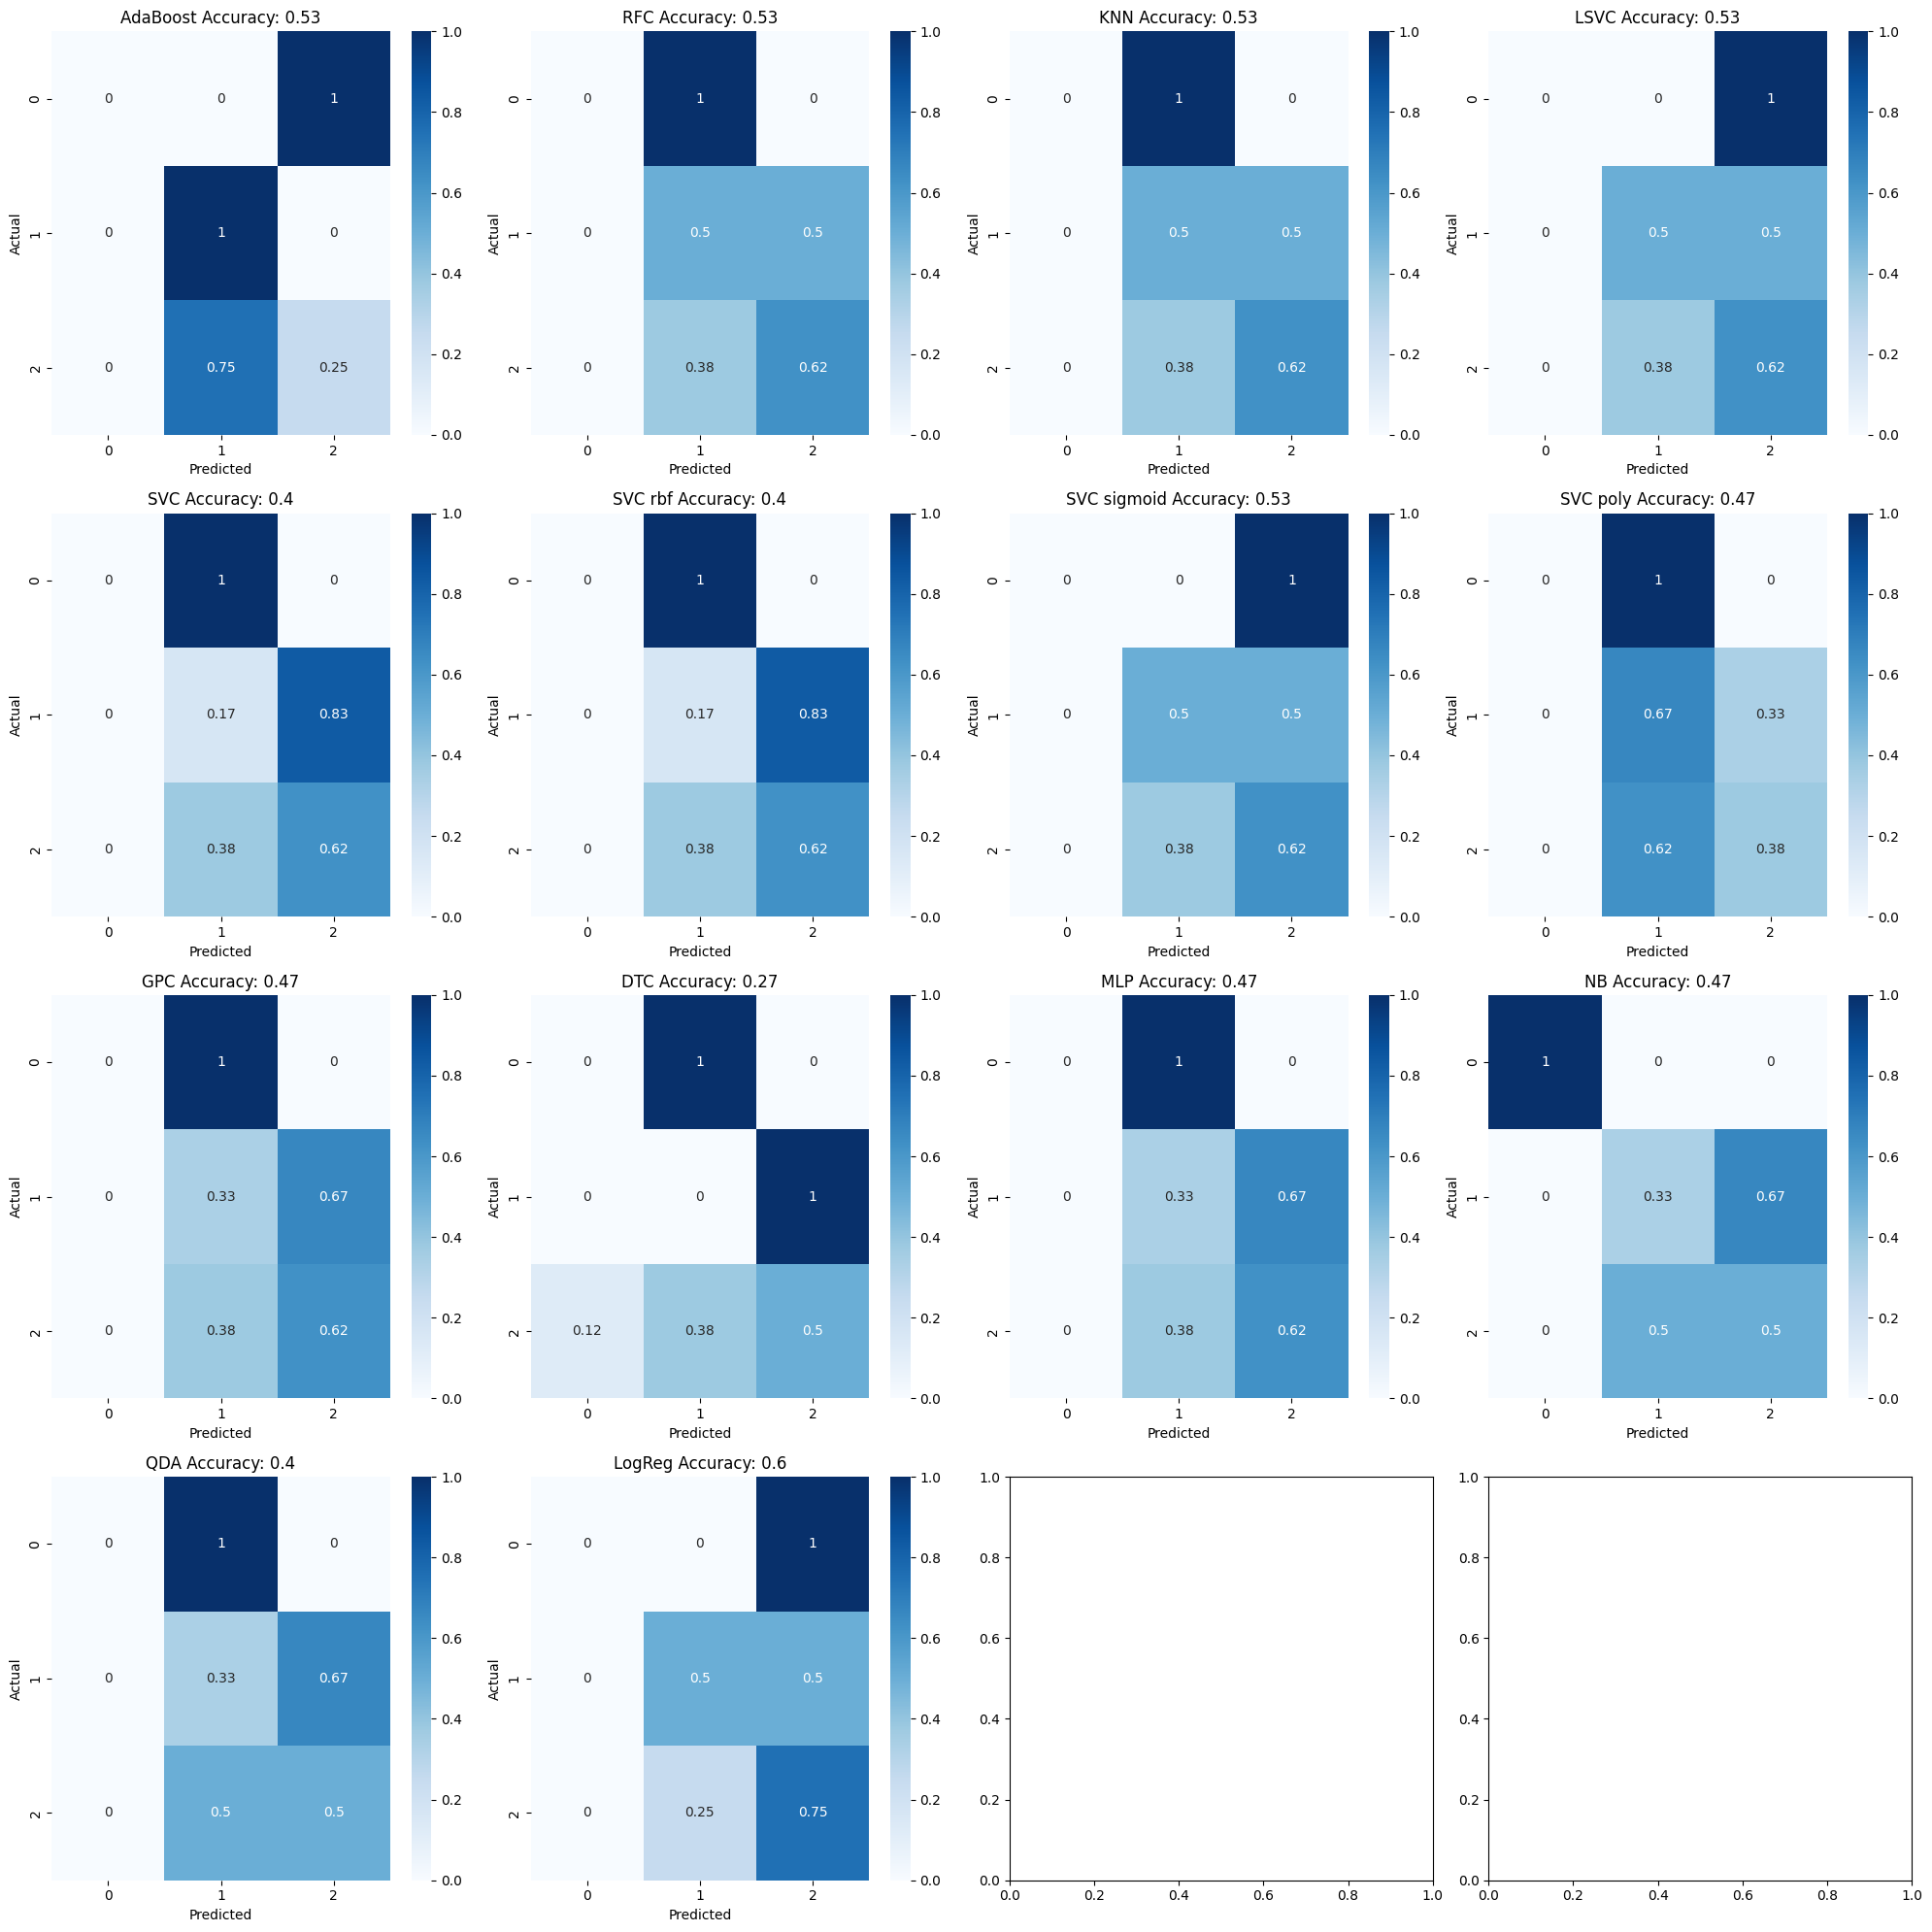

In [152]:
test_classifiers(Group_combined_feat, Group_combined_emotions)

Looking at above confusion matricies, NB and SVC (all kernals) perform best. We will now do hyperparameter tuning for these 3 to see if we can improve them

In [153]:
def SVC_hypertune(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Define the parameter grid to search over
    param_grid = {'C': [0.01 ,0.1, 1, 10, 100, 1000], 
                'gamma': [0.01 ,0.1, 1, 10, 100], 
                'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                'degree': [2, 3, 4, 5, 6],
                'coef0': [0.0, 0.5, 1.0, 1.5, 2.0]}

    # Create the SVM model
    svm = SVC()

    # Create the GridSearchCV object
    grid_search = GridSearchCV(svm, param_grid, cv=5)

    # Fit the GridSearchCV object to the data
    grid_search.fit(X_train, y_train)

    # Print the best parameters and score
    print(f'Best parameters: {grid_search.best_params_}')
    print(f'Best score: {grid_search.best_score_}')
    
    # Evaluate the model on the testing set
    accuracy = grid_search.score(X_test, y_test)
    print(f'SVM accuracy: {accuracy}')
    

def NB_hypertune(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Define the parameter grid to search over
    param_grid = {'var_smoothing': [1e-19, 1e-18, 1e-17, 1e-16, 1e-15, 1e-14, 1e-12, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

    # Create the Naive Bayes model
    nb = GaussianNB()

    # Create the GridSearchCV object
    grid_search = GridSearchCV(nb, param_grid, cv=5)

    # Fit the GridSearchCV object to the data
    grid_search.fit(X_train, y_train)

    # Print the best parameters and score
    print(f'Best parameters: {grid_search.best_params_}')
    print(f'Best score: {grid_search.best_score_}')
    
    # Evaluate the model on the testing set
    accuracy = grid_search.score(X_test, y_test)
    print(f'Naive Bayes accuracy: {accuracy}')

In [154]:
NB_hypertune(Group_combined_feat, Group_combined_emotions)
SVC_hypertune(Group_combined_feat, Group_combined_emotions)

Best parameters: {'var_smoothing': 1e-19}
Best score: 0.4444444444444445
Naive Bayes accuracy: 0.6
Best parameters: {'C': 0.1, 'coef0': 1.5, 'degree': 6, 'gamma': 0.01, 'kernel': 'poly'}
Best score: 0.5555555555555556
SVM accuracy: 0.4


Still not good but better than chance. I will also try KNN and MLP (will become clear later in notebook as these do well for binary class problem)

In [155]:
def KNN_hypertune(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # define the parameter grid to search over
    param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

    # create a KNN classifier object
    knn = KNeighborsClassifier()

    # create a GridSearchCV object with the KNN classifier and parameter grid
    grid_search = GridSearchCV(knn, param_grid, cv=5)

    # fit the GridSearchCV object to the data
    grid_search.fit(X_train, y_train)

    # print the best parameters and best score
    print("Best parameters: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)
    # Evaluate the model on the testing set
    accuracy = grid_search.score(X_test, y_test)
    print(f'KNN accuracy: {accuracy}')


def MLP_hypertune(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    param_grid = {'hidden_layer_sizes': [(50,), (100,), (150,)],
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'alpha': [0.0001, 0.001, 0.01, 0.1],
              'learning_rate': ['constant', 'invscaling', 'adaptive']}

    # create an MLP classifier object
    mlp = MLPClassifier()

    # create a GridSearchCV object with the MLP classifier and parameter grid
    grid_search = GridSearchCV(mlp, param_grid, cv=5)

    # fit the GridSearchCV object to the data
    grid_search.fit(X_train, y_train)

    # print the best parameters and best score
    print("Best parameters: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)
    # Evaluate the model on the testing set
    accuracy = grid_search.score(X_test, y_test)
    print(f'MLP accuracy: {accuracy}')

In [156]:
KNN_hypertune(Group_combined_feat, Group_combined_emotions)
MLP_hypertune(Group_combined_feat, Group_combined_emotions)

Best parameters:  {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
Best score:  0.4666666666666667
KNN accuracy: 0.5333333333333333
Best parameters:  {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'sgd'}
Best score:  0.5555555555555556
MLP accuracy: 0.5333333333333333


Both of these are overfitting so thats not ideal

None of them do very well with three classes. This could be because of the class inbalance, next we will just try binary classification where 0 and 1 are the same class (neutral + negative)

In [157]:
for i in range(len(Group_combined_emotions)):
    if Group_combined_emotions[i] == 1:
        Group_combined_emotions[i] = 0
    elif Group_combined_emotions[i] == 2:
        Group_combined_emotions[i] = 1
        
for i in range(len(Group2_emotions)):
    if Group2_emotions[i] == 1:
        Group2_emotions[i] = 0
    elif Group2_emotions[i] == 2:
        Group2_emotions[i] = 1
        
for i in range(len(Group3_emotions)):
    if Group3_emotions[i] == 1:
        Group3_emotions[i] = 0
    elif Group3_emotions[i] == 2:
        Group3_emotions[i] = 1
        

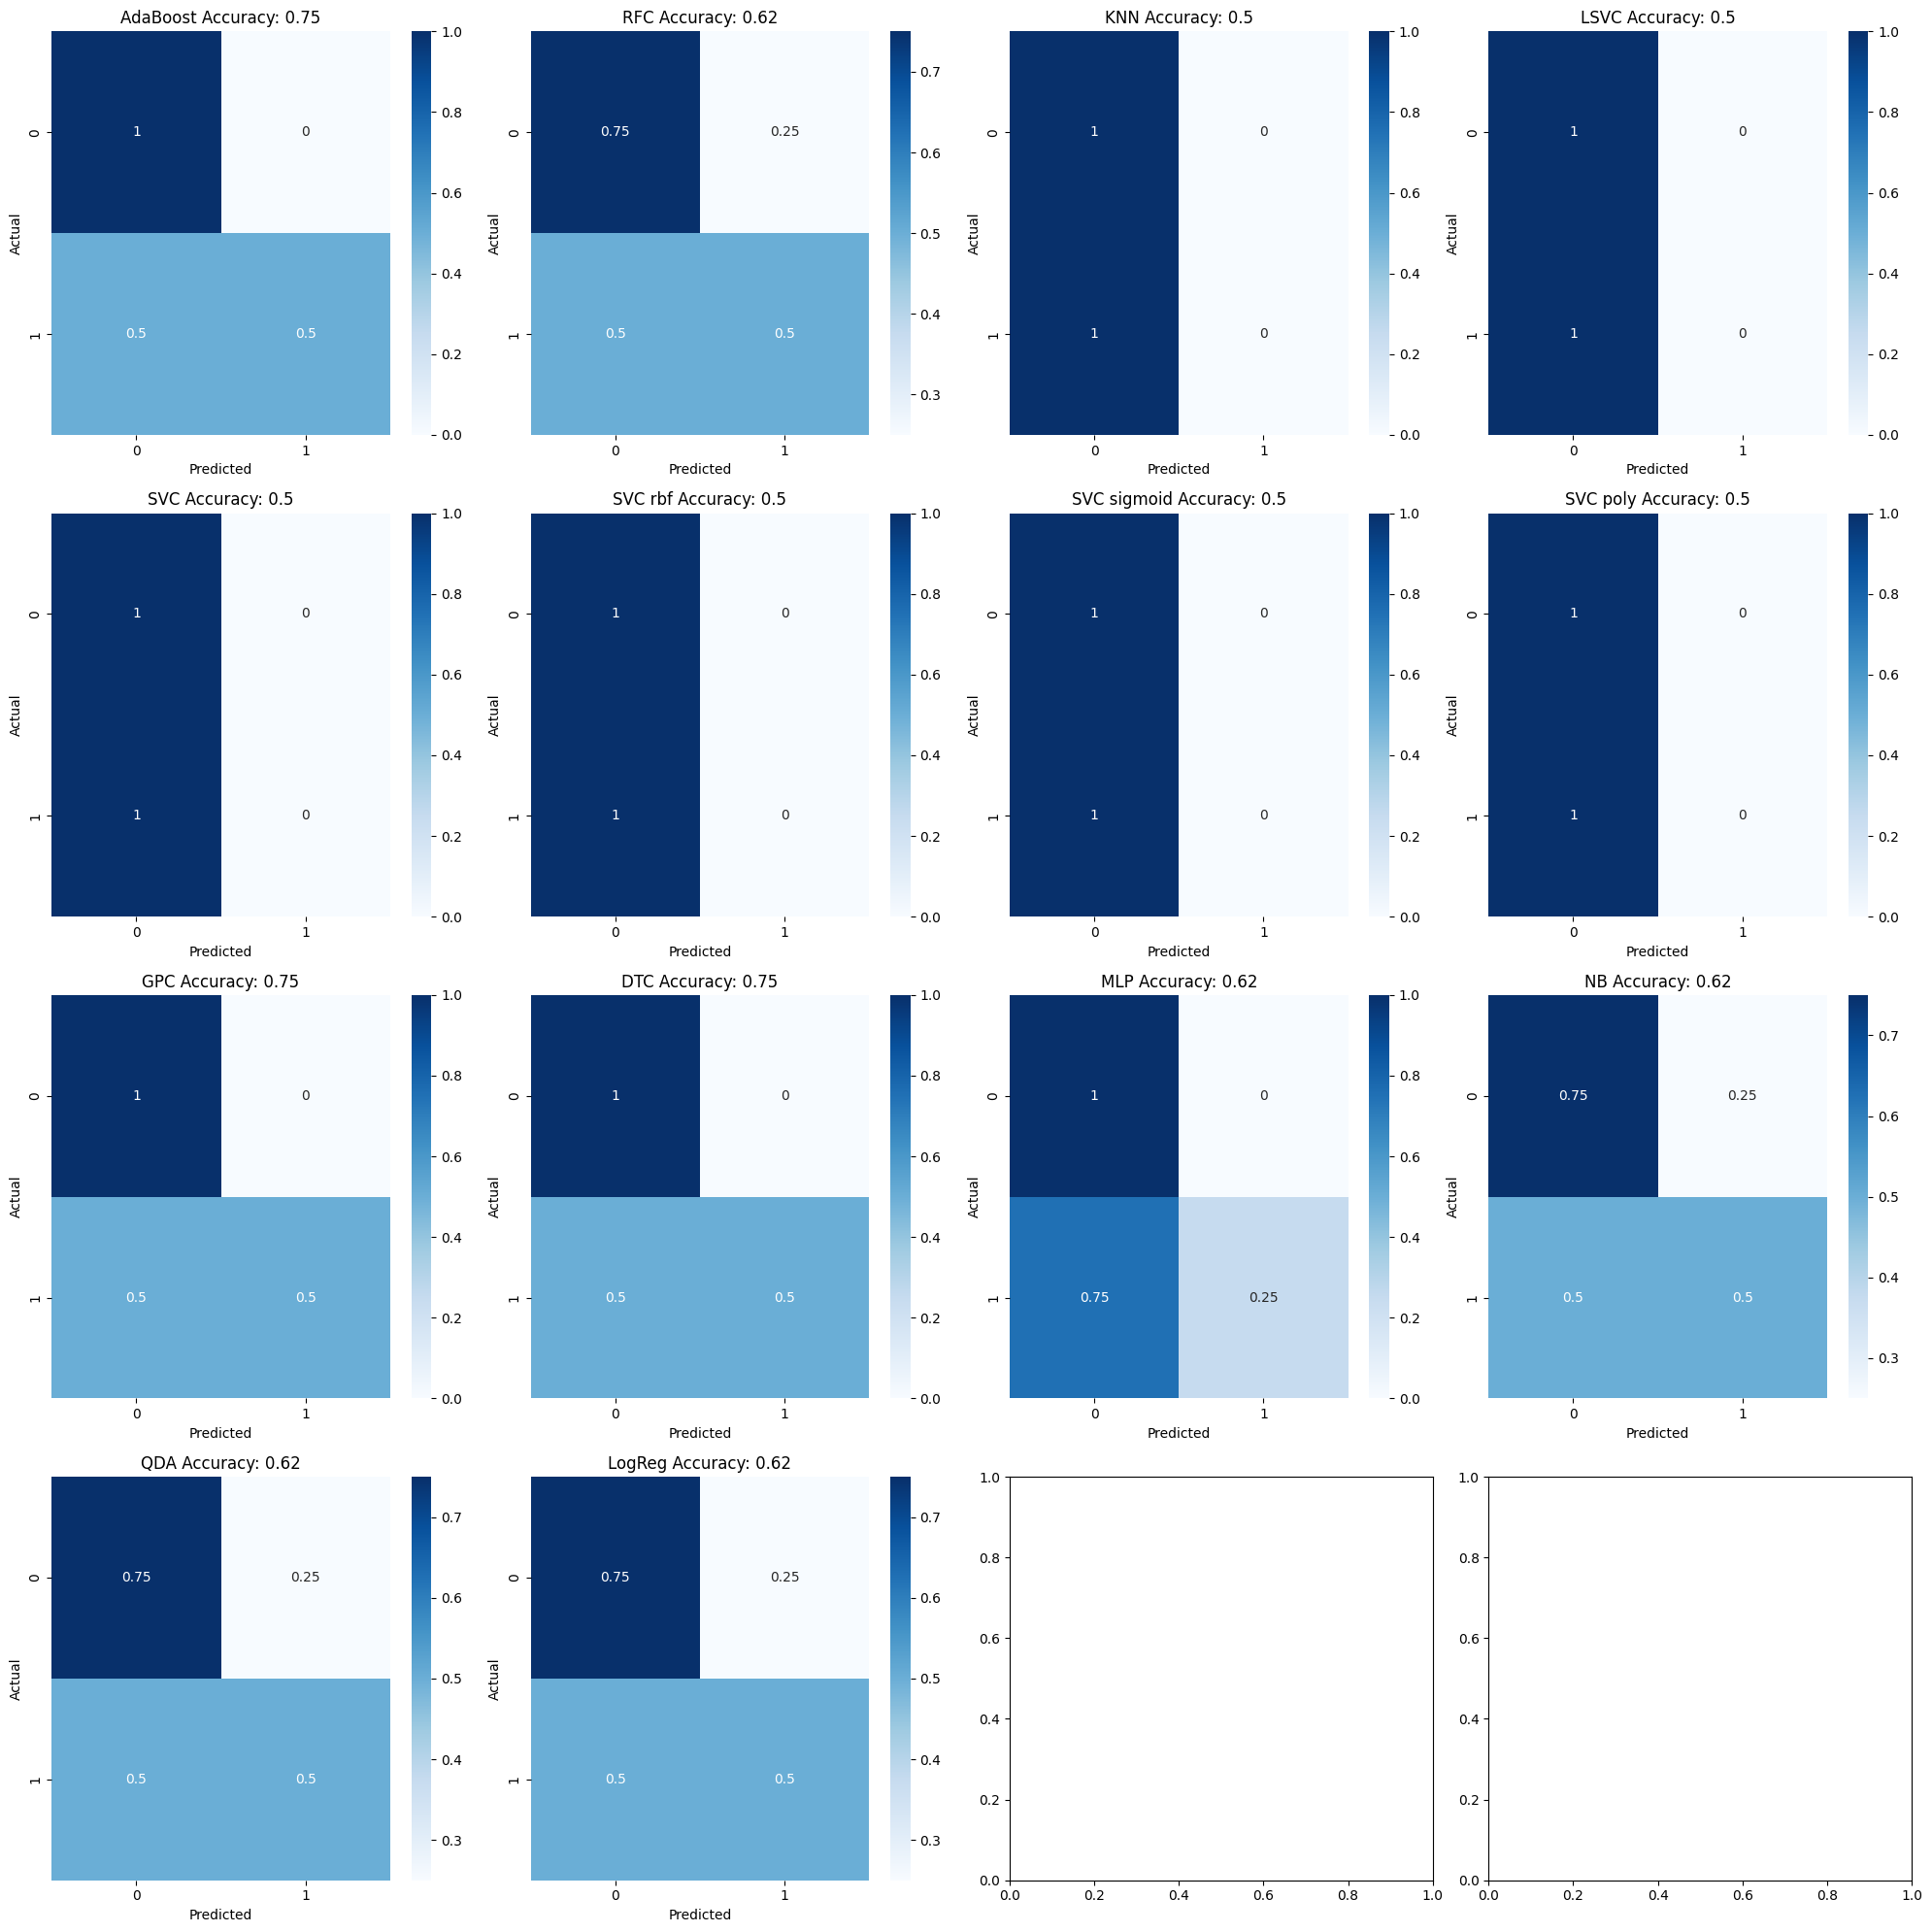

In [158]:
test_classifiers(Group2_processed_feat, Group2_emotions)

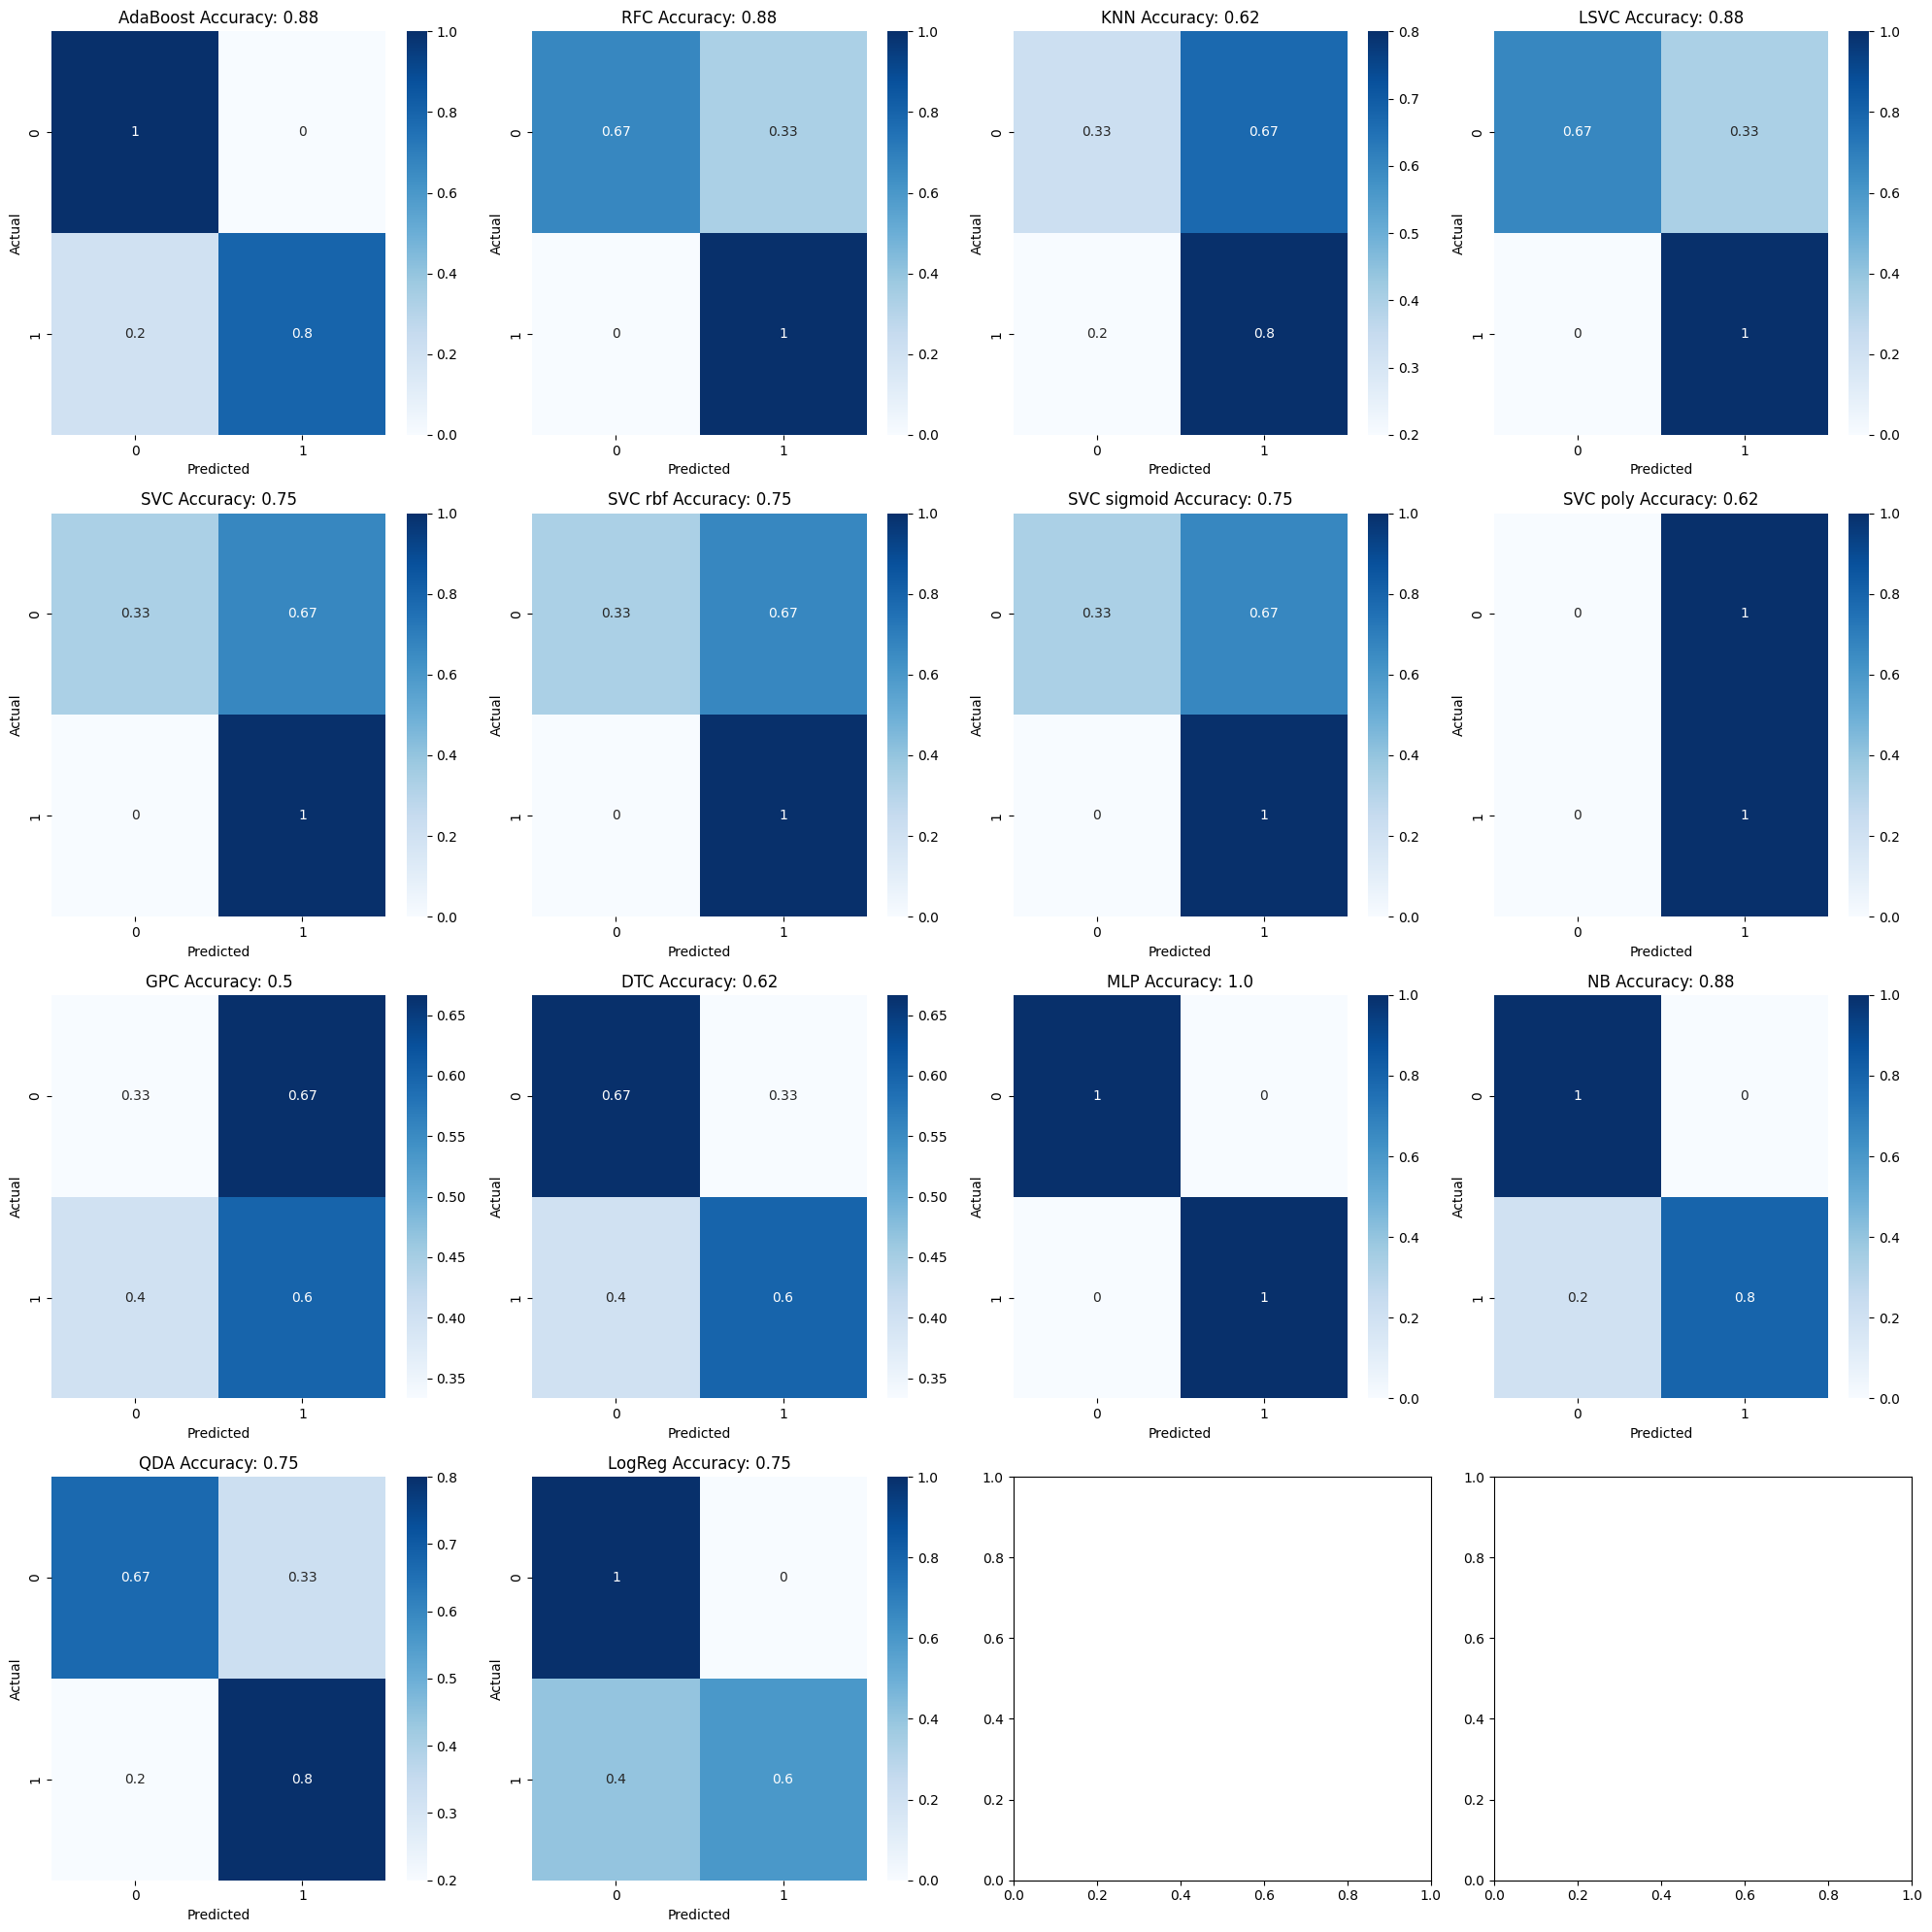

In [159]:
test_classifiers(Group3_processed_feat, Group3_emotions)

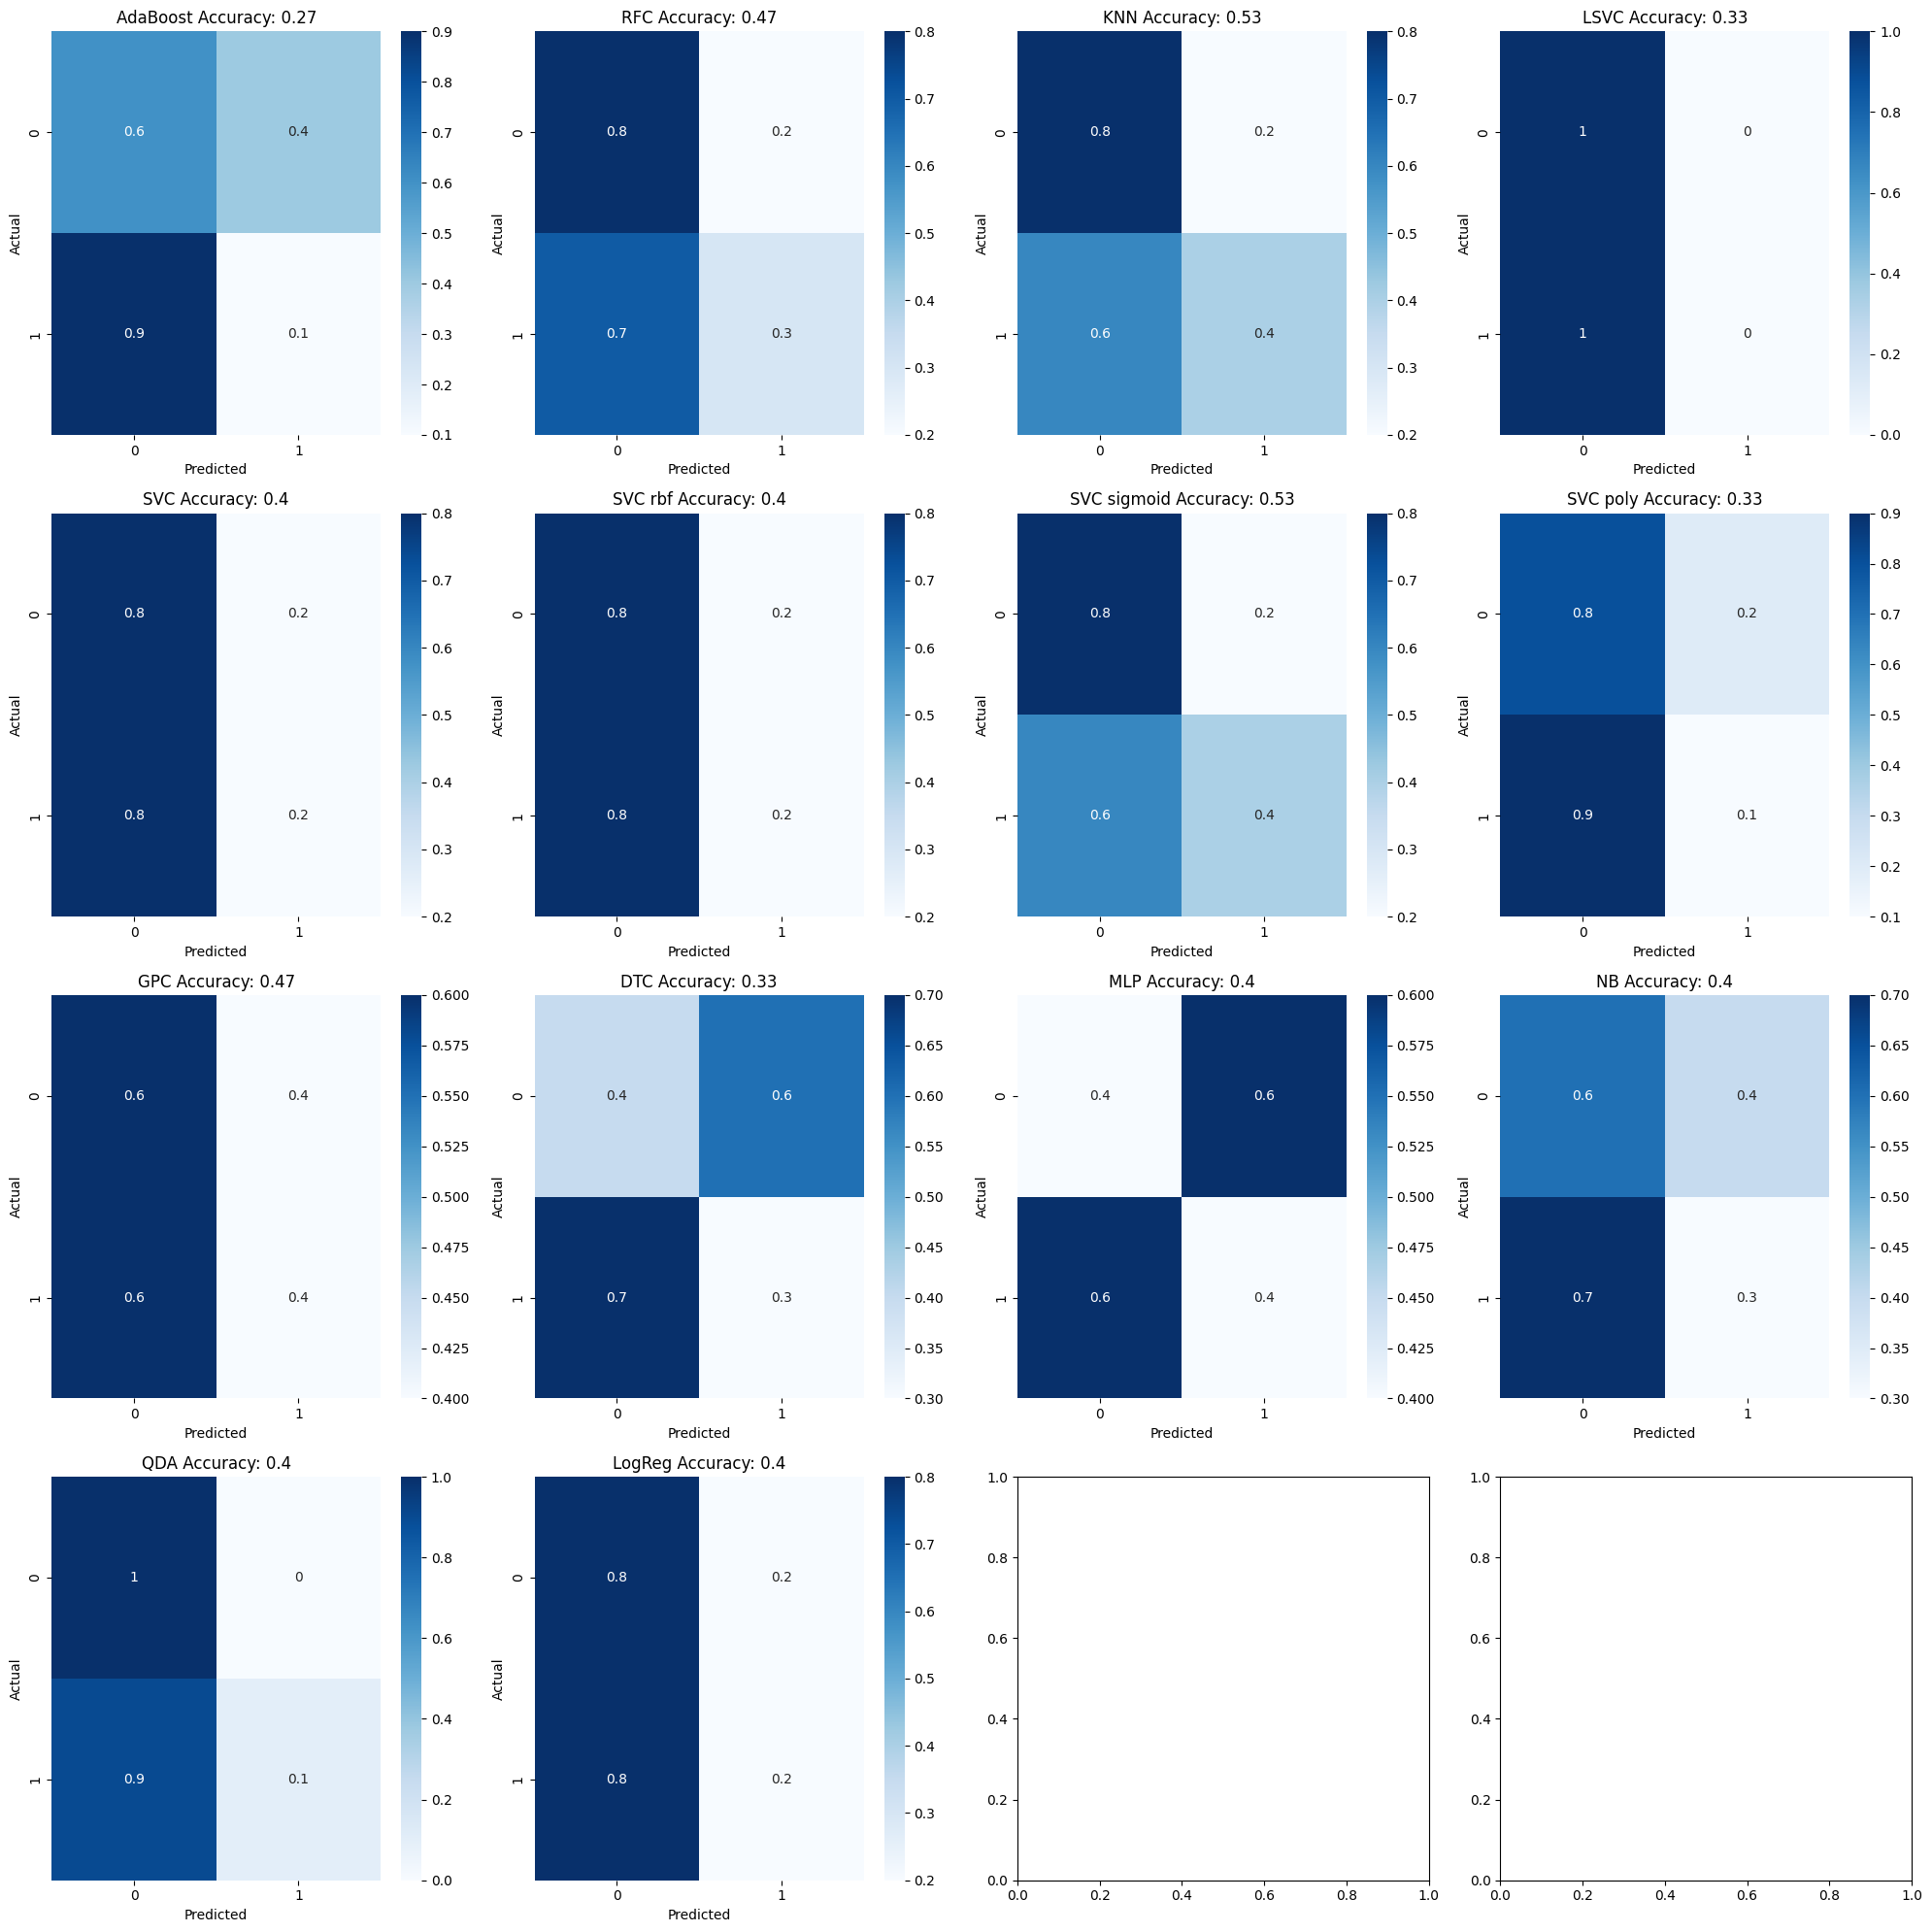

In [160]:
test_classifiers(Group_combined_feat, Group_combined_emotions)

Looking at above confusion matricies, KNN, MLP and SVC (all kernals) perform relativley well. We will now do hyperparameter tuning for these 3 to see if we can improve them

In [161]:
KNN_hypertune(Group_combined_feat, Group_combined_emotions)
MLP_hypertune(Group_combined_feat, Group_combined_emotions)
SVC_hypertune(Group_combined_feat, Group_combined_emotions)
NB_hypertune(Group_combined_feat, Group_combined_emotions)

Best parameters:  {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Best score:  0.6888888888888889
KNN accuracy: 0.4666666666666667
Best parameters:  {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Best score:  0.7555555555555554
MLP accuracy: 0.5333333333333333
Best parameters: {'C': 1, 'coef0': 1.5, 'degree': 2, 'gamma': 10, 'kernel': 'sigmoid'}
Best score: 0.6222222222222221
SVM accuracy: 0.4666666666666667
Best parameters: {'var_smoothing': 1e-19}
Best score: 0.5333333333333334
Naive Bayes accuracy: 0.5333333333333333


KNN performs well again and so does mlp but this could be overfitting

Ill now try classification based on group, all 3 groups can be included in this 

In [170]:
all_groups = []
all_groups.extend(Group1_processed)
all_groups.extend(Group2_processed)
all_groups.extend(Group3_processed)

all_scores = []
all_scores.extend(np.ones(len(Group1_processed)))
all_scores.extend(np.ones(len(Group2_processed))*2)
all_scores.extend(np.ones(len(Group3_processed))*3)



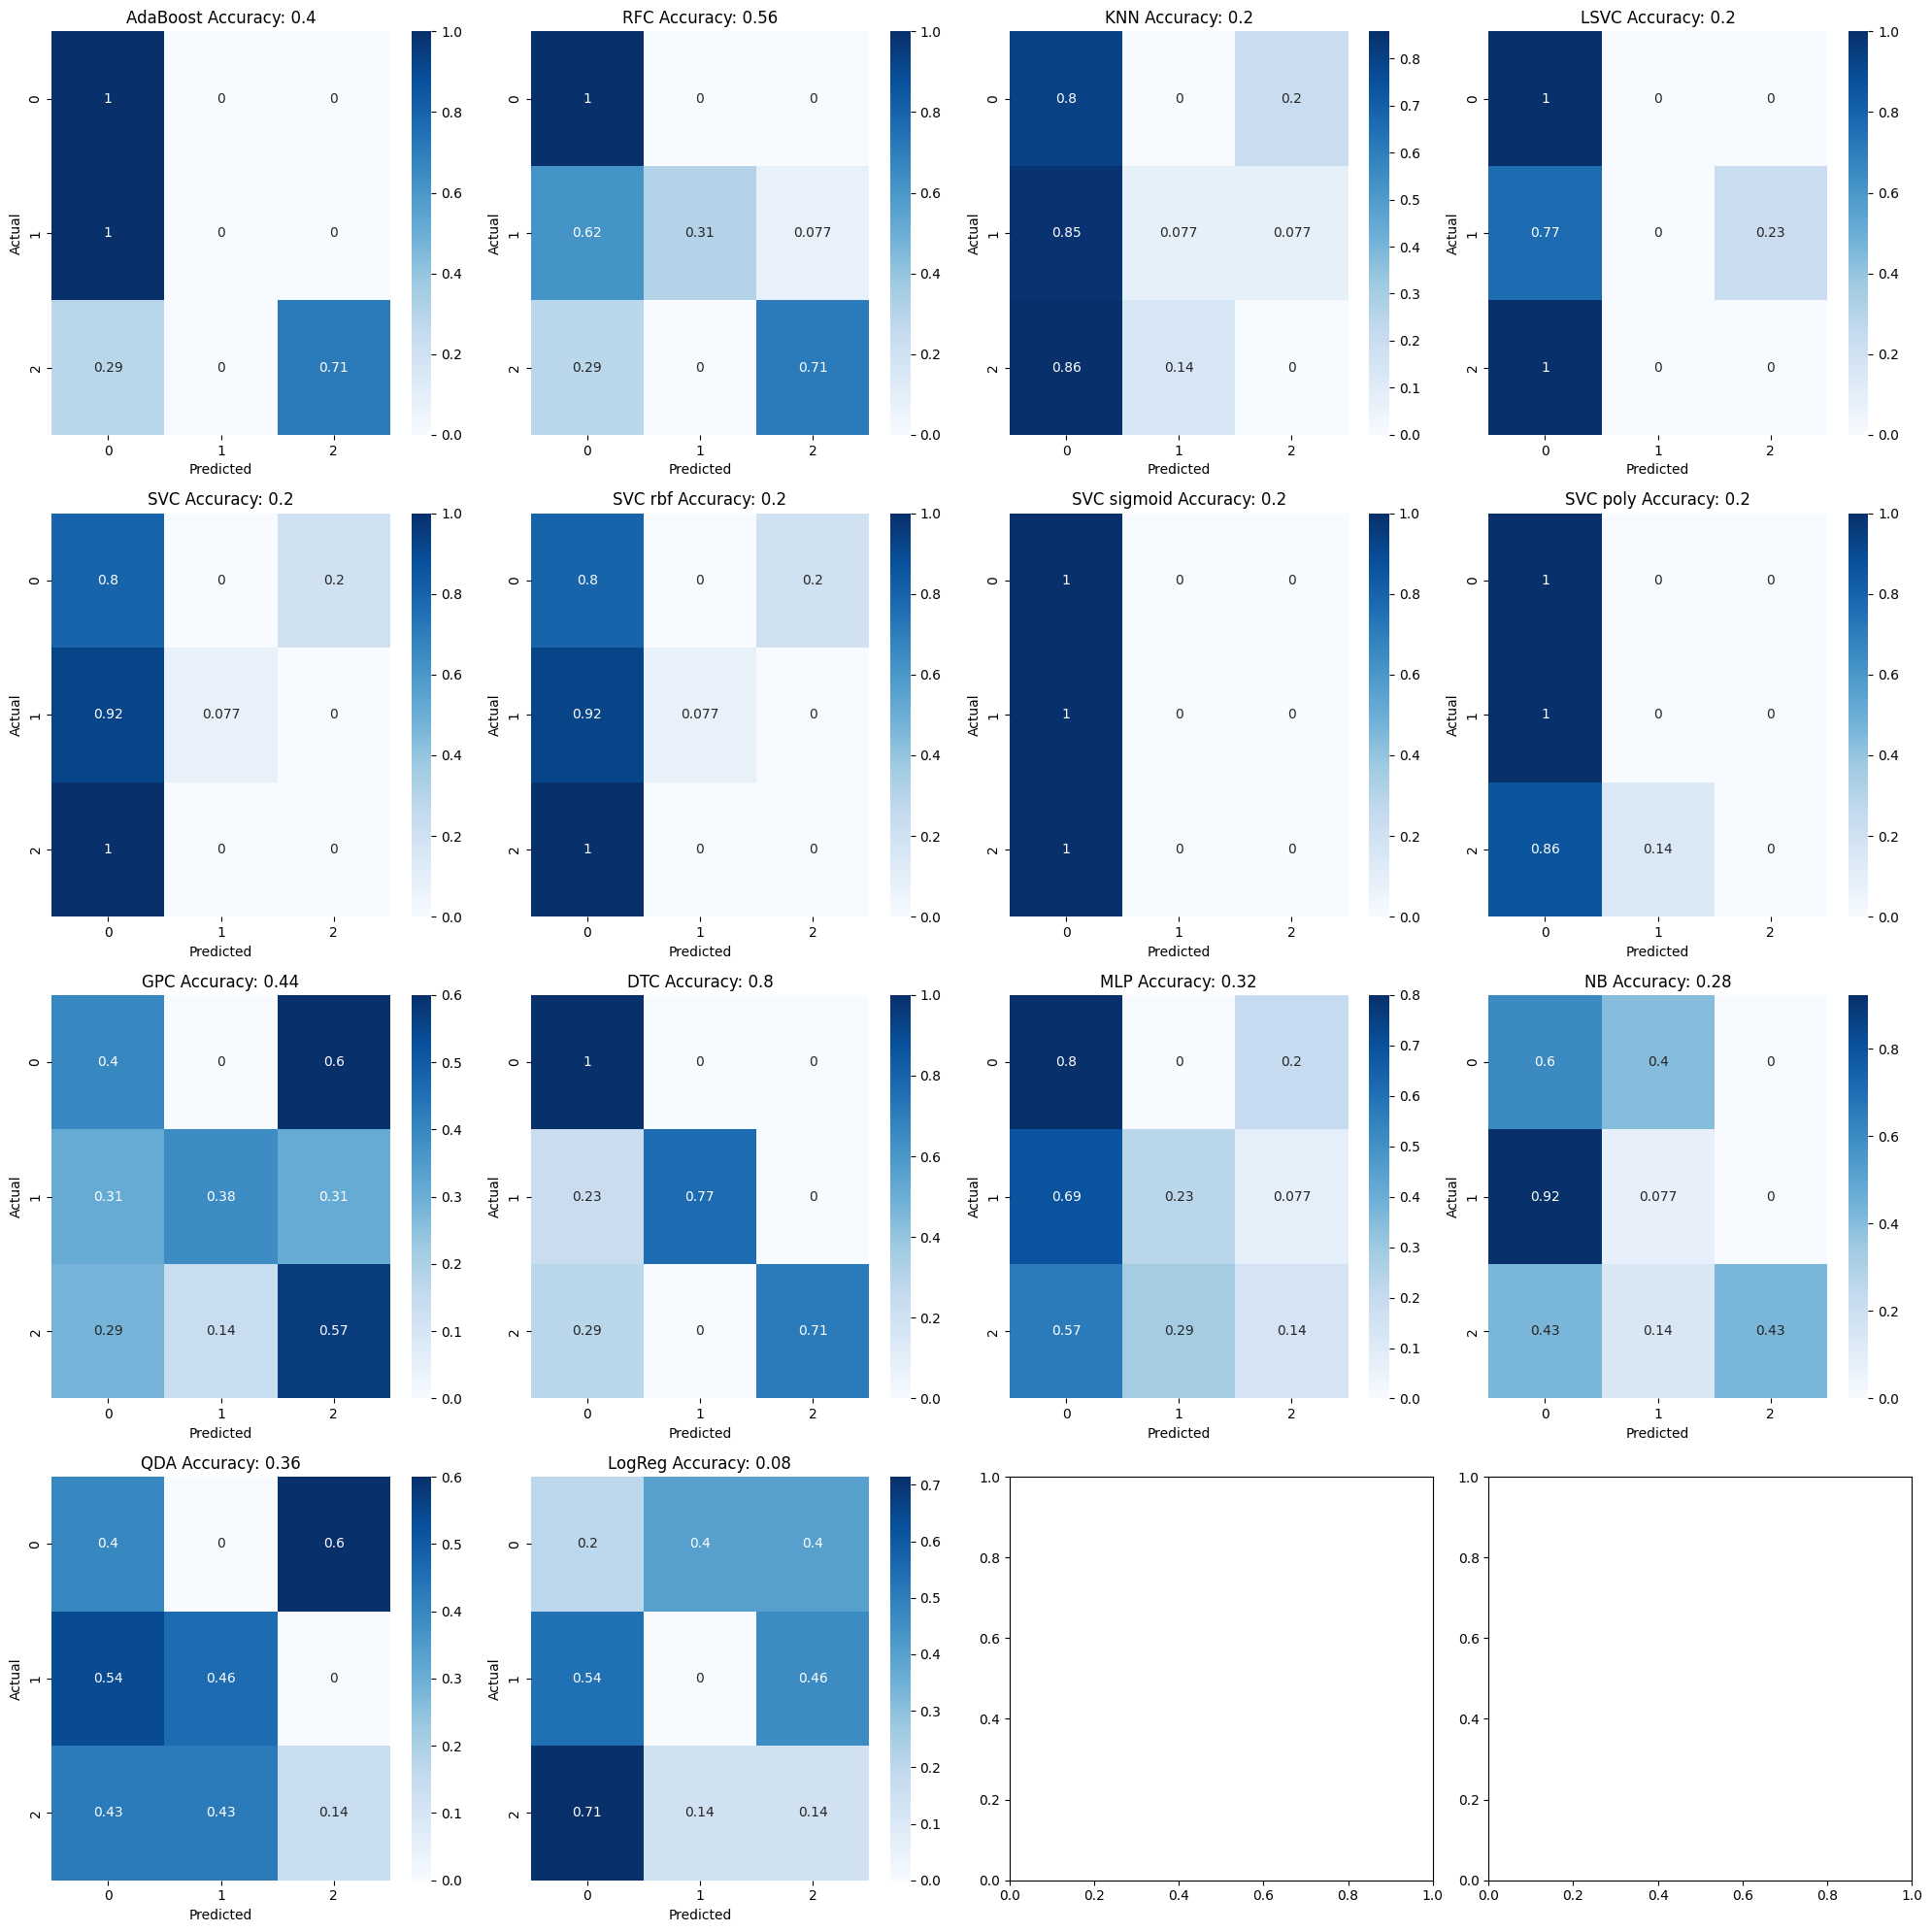

In [171]:
test_classifiers(all_groups, all_scores)

Random Forrest and Decision trees do very well in this task 

Now im going to try calculating HRV metrics in intervals of 5 mins to use in a DL architecture

In [2]:
def load_data(dir):
    data = []
    order = []
    for file in os.listdir(dir):
        if file.endswith(".csv"):
            print(os.path.join(dir, file))
            df = pd.read_csv(os.path.join(dir, file),on_bad_lines='skip')
            if not df.empty:
                order.append(int(file[:-4]))
                data.append(df)
    return data, order


try:
    Group1, Group1_order = load_data("/mnt/ArtHeart/Data/Group 1")
    Group2, Group2_order = load_data("/mnt/ArtHeart/Data/Group 2")
    Group3, Group3_order = load_data("/mnt/ArtHeart/Data/Group 3")
except:
    try:
        Group1, Group1_order = load_data("Data/Group 1")
        Group2, Group2_order = load_data("Data/Group 2")
        Group3, Group3_order = load_data("Data/Group 3")
    except:
        Group1, Group1_order = load_data("W:\PhD\ArtHeart\Data\Group 1")
        Group2, Group2_order = load_data("W:\PhD\ArtHeart\Data\Group 2")
        Group3, Group3_order = load_data("W:\PhD\ArtHeart\Data\Group 3")


W:\PhD\ArtHeart\Data\Group 1\1.csv
W:\PhD\ArtHeart\Data\Group 1\10.csv
W:\PhD\ArtHeart\Data\Group 1\11.csv
W:\PhD\ArtHeart\Data\Group 1\12.csv
W:\PhD\ArtHeart\Data\Group 1\13.csv
W:\PhD\ArtHeart\Data\Group 1\14.csv
W:\PhD\ArtHeart\Data\Group 1\15.csv
W:\PhD\ArtHeart\Data\Group 1\16.csv
W:\PhD\ArtHeart\Data\Group 1\17.csv
W:\PhD\ArtHeart\Data\Group 1\18.csv
W:\PhD\ArtHeart\Data\Group 1\19.csv
W:\PhD\ArtHeart\Data\Group 1\2.csv
W:\PhD\ArtHeart\Data\Group 1\20.csv
W:\PhD\ArtHeart\Data\Group 1\21.csv
W:\PhD\ArtHeart\Data\Group 1\22.csv
W:\PhD\ArtHeart\Data\Group 1\23.csv
W:\PhD\ArtHeart\Data\Group 1\24.csv
W:\PhD\ArtHeart\Data\Group 1\25.csv
W:\PhD\ArtHeart\Data\Group 1\26.csv
W:\PhD\ArtHeart\Data\Group 1\27.csv
W:\PhD\ArtHeart\Data\Group 1\28.csv
W:\PhD\ArtHeart\Data\Group 1\29.csv
W:\PhD\ArtHeart\Data\Group 1\3.csv
W:\PhD\ArtHeart\Data\Group 1\30.csv
W:\PhD\ArtHeart\Data\Group 1\31.csv
W:\PhD\ArtHeart\Data\Group 1\32.csv
W:\PhD\ArtHeart\Data\Group 1\33.csv
W:\PhD\ArtHeart\Data\Group 1\34

In [6]:
import neurokit2 as nk
from biosppy.signals import ppg 

def match_interpolate_hr(time,hr_time,hr):
    inter_hr = np.nan*np.ones(len(time)) # initialize interpolated hr array
    
    for i in range(len(hr_time)):
        j = hr_time[i]
        # find index of time that is closest in time to i
        idx = np.argmin(np.abs(time-j))
        inter_hr[int(idx)] = hr[i]
    
    # interpolate missing values

    inter_hr = pd.DataFrame(columns=['hr'], data=inter_hr)
    if pd.isnull(inter_hr['hr'][0]):
        inter_hr['hr'][0] = hr[0]
    inter_hr = inter_hr.interpolate(method='linear')
    inter_hr = inter_hr.values.flatten()
    return inter_hr


def custom_process(data, sample_rate=24):
    clean_data = ppg.ppg(signal=data, sampling_rate=sample_rate, show=False)
    
    raw = data.values
    clean_sig = clean_data[1]
    time = clean_data[0]
    
    
    heart_rate = clean_data[4]
    heart_rate_ts = clean_data[3]
    
    hr = match_interpolate_hr(time,heart_rate_ts,heart_rate)
    quality = nk.ecg_quality(clean_sig, sampling_rate=sample_rate)

    # find ppg_peaks by making np array of zeros of length of clean_sig and then set 1 to the values of clean_data[2]
    ppg_peaks = np.zeros(len(clean_sig))
    ppg_peaks[clean_data[2]] = 1
    
    signals = pd.DataFrame({"PPG_Raw": np.array(raw),
                            "PPG_Clean": np.array(clean_sig),
                            "PPG_Peaks": ppg_peaks,
                            "PPG_Rate": np.array(hr),
                            "PPG_Quality": quality})
    
    return signals



def process_data(data, sample_rate=24):
    processed_data = []
    for dat in data:
        temp = dat['DATA']
        temp_intervals = []
        pro_temp = []
        interval_length = 5*60*sample_rate
        num_intervals = len(temp) // interval_length
        for i in range(num_intervals):
            start_idx = i * interval_length
            end_idx = (i + 1) * interval_length
            temp_intervals.append(temp[start_idx:end_idx])
            
        for i in range(len(temp_intervals)):
            try:
                pro_temp.append(nk.ppg_analyze(custom_process(temp_intervals[i], sample_rate=24), sampling_rate=24))
            except:
                print("Error in processing interval " + str(i) + " of " + str(len(temp_intervals)))
            
        processed_data.append(pro_temp)
        
    shortest_list = len(min(processed_data, key=len))
    
    for i in range(len(processed_data)):
        if len(processed_data[i]) > shortest_list:
            processed_data[i] = processed_data[i][:shortest_list]
        
    return processed_data
    


# excluding Group 1        
#Group1_processed = process_data(Group1)
Group2_processed = process_data(Group2)
Group3_processed = process_data(Group3)

shortest_list = min(len(min(Group2_processed, key=len)), len(min(Group3_processed, key=len)))

for i in range(len(Group2_processed)):
    if len(Group2_processed[i]) > shortest_list:
        Group2_processed[i] = Group2_processed[i][:shortest_list]
            
for i in range(len(Group3_processed)):
    if len(Group3_processed[i]) > shortest_list:
        Group3_processed[i] = Group3_processed[i][:shortest_list]
 
print(shortest_list)

df_order2 = pd.DataFrame(Group2_order, columns=['Order'])
df_order3 = pd.DataFrame(Group3_order, columns=['Order'])


for item in Group2_processed:
    item = pd.concat(item, axis=0)
    
for item in Group3_processed:
    item = pd.concat(item, axis=0)


Error in processing interval 10 of 18
Error in processing interval 11 of 18
Error in processing interval 13 of 18
Error in processing interval 12 of 17
Error in processing interval 5 of 13
12


In [7]:
try:
    Group1_scores, Group1_scores_order, Group1_emotions = load_Scores("/mnt/ArtHeart/Data/Group 1 Scores.xlsx")
    Group2_scores,Group2_scores_order, Group2_emotions = load_Scores("/mnt/ArtHeart/Data/Group 2 Scores.xlsx")
    Group3_scores,Group3_scores_order, Group3_emotions = load_Scores("/mnt/ArtHeart/Data/Group 3 Scores.csv")
except:
    try:
        Group1_scores, Group1_scores_order, Group1_emotions = load_Scores("W:\PhD\ArtHeart\Data\Group 1 Scores.xlsx")
        Group2_scores,Group2_scores_order, Group2_emotions = load_Scores("W:\PhD\ArtHeart\Data\Group 2 Scores.xlsx")
        Group3_scores,Group3_scores_order, Group3_emotions = load_Scores("W:\PhD\ArtHeart\Data\Group 3 Scores.csv")

    except:
        Group1_scores, Group1_scores_order, Group1_emotions = load_Scores("Data/Group 1 Scores.xlsx")
        Group2_scores,Group2_scores_order, Group2_emotions = load_Scores("Data/Group 2 Scores.xlsx")
        Group3_scores,Group3_scores_order, Group3_emotions = load_Scores("Data/Group 3 Scores.csv")




#Group1_scores, Group1_processed, Group1_emotions = match_scores_to_data(Group1_scores, Group1_scores_order, Group1_emotions, Group1_processed, Group1_order)
Group2_scores, Group2_processed, Group2_emotions = match_scores_to_data(Group2_scores, Group2_scores_order, Group2_emotions, Group2_processed, Group2_order)
Group3_scores, Group3_processed, Group3_emotions = match_scores_to_data(Group3_scores, Group3_scores_order, Group3_emotions, Group3_processed, Group3_order)

print(len(Group2_processed))
print(len(Group2_emotions))
print(len(Group3_processed))
print(len(Group3_emotions))


/mnt/ArtHeart/Data/Group 1 Scores.xlsx
/mnt/ArtHeart/Data/
W:\PhD\ArtHeart\Data\Group 1 Scores.xlsx
W:\PhD\ArtHeart\Data\
W:\PhD\ArtHeart\Data\Group 2 Scores.xlsx
W:\PhD\ArtHeart\Data\
W:\PhD\ArtHeart\Data\Group 3 Scores.csv
W:\PhD\ArtHeart\Data
30
30
30
30


In [8]:
for item in Group2_processed:
    item = np.array(item)
    
for item in Group3_processed:
    item = np.array(item)


In [10]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

Group2_processed = std.fit_transform(Group2_processed)
Group3_processed = std.fit_transform(Group3_processed)